# Quote Wrangler and Trade Wrangler DEMO 

In [61]:
import sys
sys.path.insert(0, "../Helper_Input")
from iex_helper import * #imports stock_data class from iex_helper.py
import time
#######################################################
start = time.time()
quotes = '../Training_Files/AAPL_train.csv' #
q = pd.read_csv(quotes,low_memory = False)
AAPL_QW = Quote_Wrangler(quotes) #initiate class
end = time.time()
print('Time to Completion: ', end-start, " seconds")

Time to Completion:  5.368919372558594  seconds


In [62]:
help(AAPL_QW)

Help on Quote_Wrangler in module iex_helper object:

class Quote_Wrangler(builtins.object)
 |  Quote_Wrangler(quotes_file)
 |  
 |  The Quote_Wrangler class is designed to take in a "quotes" file as downloaded from the TAQ database - and extract
 |  a time series of National Best Bid/Offer adjustments during a trading day.
 |  
 |  Methods defined here:
 |  
 |  BBO_series(self)
 |      Returns a dataframe that contains ONLY BB0 eligible Quotes as outlined by QU_COND codes 'O','R','Y'.
 |      For more information see the TAQ Reference guide.  https://www.nyse.com/publicdocs/nyse/data/Daily_TAQ_Client_Spec_v3.0.pdf
 |  
 |  NB_combiner(self, exchange_filter='')
 |      #Ready for Cythonification
 |      Core function that breaks out quotes that adjust something related to either the National Best Bid or the
 |      National Best Offer, whether that be the actual price of the NBB/NBO or the quantity at the current NBB/NBO.
 |      
 |      Using this function we can determine when excha

## First, we use built in methods to extract the consolidated BBO or the NBBO series.

In [63]:
NBBO = AAPL_QW.NB_master
NBBO.head() #Consolidated NBBO


,Time,B_Exchanges,B_Vol_Ex,B_Vol_Tot,Bid,Ask,A_Vol_Tot,A_Vol_Ex,A_Exchanges,Flag,Spread,Mid,Weighted Avg Mid
0,09:00:06.476309,[P],[1.0],1.0,172.77,172.87,1.0,[1.0],[P],NBB,0.10,172.820,172.820000
1,09:00:22.725508,[P],[2.0],2.0,172.78,172.87,1.0,[1.0],[P],NBB,0.09,172.825,172.810000
2,09:00:22.763127,[P],[2.0],2.0,172.78,172.80,39.0,[39.0],[K],NBO,0.02,172.790,172.799024
3,09:00:23.331916,[P],[2.0],2.0,172.78,172.80,38.0,[38.0],[K],NBO,0.02,172.790,172.799000
4,09:00:47.518971,[P],[2.0],2.0,172.78,172.80,33.0,[33.0],[K],NBO,0.02,172.790,172.798857


#### Next, we can isolate NBB only for analysis 

In [4]:
NBB  = AAPL_QW.NB_master[AAPL_QW.NB_master.Flag == 'NBB']

### Run "cj_flagger" to idenitfy cases of creation or joining

In [64]:
#create or joins on the Bid Side 
start = time.time()
NBB_cj = AAPL_QW.cj_flagger(nbb_flag = True)
end = time.time()
print('Time to Completion: ', end-start, " seconds")
NBB_cj.head(100)

../Helper_Input\iex_helper.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nb_df['Creates'] = create_master
../Helper_Input\iex_helper.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nb_df['Joins'] = join_master


Time to Completion:  0.5770304203033447  seconds


,Time,B_Exchanges,B_Vol_Ex,B_Vol_Tot,Bid,Ask,A_Vol_Tot,A_Vol_Ex,A_Exchanges,Flag,Spread,Mid,Weighted Avg Mid,Creates,Joins
0,09:00:06.476309,[P],[1.0],1.0,172.77,172.87,1.0,[1.0],[P],NBB,0.10,172.820,172.820000,,
1,09:00:22.725508,[P],[2.0],2.0,172.78,172.87,1.0,[1.0],[P],NBB,0.09,172.825,172.810000,,
5,09:00:48.930833,[P],[1.0],1.0,172.77,172.80,33.0,[33.0],[K],NBB,0.03,172.785,172.799118,,
11,09:01:13.585768,[Y],[1.0],1.0,172.78,172.82,1.0,[1.0],[K],NBB,0.04,172.800,172.800000,,
12,09:01:13.585769,"[K, Y]","[1.0, 1.0]",2.0,172.78,172.82,1.0,[1.0],[K],NBB,0.04,172.800,172.793333,{'K': 1.0},
13,09:01:13.585790,"[J, K, Y]","[1.0, 1.0, 1.0]",3.0,172.78,172.82,1.0,[1.0],[K],NBB,0.04,172.800,172.790000,{'J': 1.0},
14,09:01:13.585809,"[J, K, Y, Z]","[1.0, 1.0, 1.0, 1.0]",4.0,172.78,172.82,1.0,[1.0],[K],NBB,0.04,172.800,172.788000,{'Z': 1.0},
15,09:01:13.586037,"[J, K, P, Y, Z]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0,172.78,172.82,1.0,[1.0],[K],NBB,0.04,172.800,172.786667,{'P': 1.0},
18,09:01:13.615745,"[J, K, P, Z]","[1.0, 1.0, 1.0, 1.0]",4.0,172.78,172.81,4.0,[4.0],[Q],NBB,0.03,172.795,172.795000,,
19,09:01:13.615749,"[J, K, P]","[1.0, 1.0, 1.0]",3.0,172.78,172.81,4.0,[4.0],[Q],NBB,0.03,172.795,172.797143,,


### Get mid quote price

- Get current mid quote price

In [6]:
create_count,join_count = cj_count(NBB_cj)

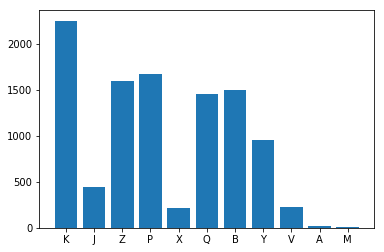

In [9]:
import matplotlib.pyplot as plt
plt.bar(range(len(create_count)), list(create_count.values()), align='center')
plt.xticks(range(len(create_count)), list(create_count.keys()))
plt.show()

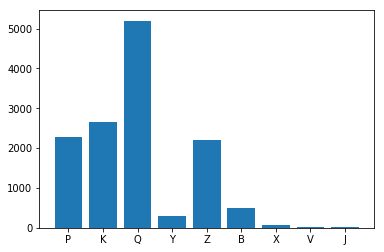

In [8]:
import matplotlib.pyplot as plt
plt.bar(range(len(join_count)), list(join_count.values()), align='center')
plt.xticks(range(len(join_count)), list(join_count.keys()))
plt.show()

In [19]:
from collections import defaultdict

create_count_dict = defaultdict(int)
join_count_dict = defaultdict(int)
for i,line in enumerate(NBB_cj.itertuples(index = False)):
    try:
        ex = list(line.Creates.items())[0][0]
        create_count_dict[ex] += 1
    except:
        try:
            ex = list(line.Joins.items())[0][0]
            join_count_dict[ex] += 1
        except:
            continue


    
    

In [20]:
print('Most Common Creates:', create_count_dict)
print('Most Common Joins', join_count_dict)

Most Common Creates: defaultdict(<class 'int'>, {'K': 2252, 'J': 446, 'Z': 1597, 'P': 1674, 'X': 219, 'Q': 1450, 'B': 1495, 'Y': 957, 'V': 231, 'A': 17, 'M': 9})
Most Common Joins defaultdict(<class 'int'>, {'P': 2282, 'K': 2646, 'Q': 5197, 'Y': 301, 'Z': 2204, 'B': 503, 'X': 67, 'V': 9, 'J': 22})


In [21]:
AAPL_QW.exchange_map

{'A': 'NYSE MKT LLC',
 'B': 'NASDAQ OMX BX, Inc.',
 'C': 'National Stock Exchange Inc. (NSX)',
 'D': 'Financial Industry Regulatory Authority, Inc. (FINRA ADF)',
 'I': 'International Securities Exchange, LLC (ISE)',
 'J': 'Bats EDGA Exchange, INC',
 'K': 'Bats EDGX Exchange, Inc.',
 'M': 'Chicago Stock Exchange, Inc. (CHX)',
 'N': 'New York Stock Exchange LLC',
 'P': 'NYSE Arca, Inc.',
 'S': 'Consolidated Tape System',
 'T': 'NASDAQ Stock Exchange, LLC (in Tape A, B securities)',
 'Q': 'NASDAQ Stock Exchange, LLC (in Tape C securities)',
 'V': 'The Investors Exchange, LLC (IEX)',
 'W': 'Chicago Broad Options Exchange, Inc.(CBOE)',
 'X': 'NASDAQ OMX PSX, Inc. LLC',
 'Y': 'Bats BYX Exchange, Inc.',
 'Z': 'Bats BZX Exchange, Inc.'}

In [41]:
#create or joins on the Bid Side 
start = time.time()
NBO_cj = AAPL_QW.cj_flagger(nbb_flag = False)
end = time.time()
print('Time to Completion: ', end-start, " seconds")
NBO_cj.head(20)

Time to Completion:  0.5089530944824219  seconds


,Time,B_Exchanges,B_Vol_Ex,B_Vol_Tot,Bid,Ask,A_Vol_Tot,A_Vol_Ex,A_Exchanges,Flag,Spread,Mid,Weighted Avg Mid,Creates,Joins
2,09:00:22.763127,[P],[2.0],2.0,172.78,172.80,39.0,[39.0],[K],NBO,0.02,172.790,172.799024,,
3,09:00:23.331916,[P],[2.0],2.0,172.78,172.80,38.0,[38.0],[K],NBO,0.02,172.790,172.799000,,
4,09:00:47.518971,[P],[2.0],2.0,172.78,172.80,33.0,[33.0],[K],NBO,0.02,172.790,172.798857,,
6,09:00:48.950897,[P],[1.0],1.0,172.77,172.80,32.0,[32.0],[K],NBO,0.03,172.785,172.799091,,
7,09:00:50.328567,[P],[1.0],1.0,172.77,172.80,28.0,[28.0],[K],NBO,0.03,172.785,172.798966,,
8,09:01:01.584113,[P],[1.0],1.0,172.77,172.80,21.0,[21.0],[K],NBO,0.03,172.785,172.798636,,
9,09:01:13.584744,[P],[1.0],1.0,172.77,172.80,18.0,[18.0],[K],NBO,0.03,172.785,172.798421,,
10,09:01:13.585644,[P],[1.0],1.0,172.77,172.82,1.0,[1.0],[K],NBO,0.05,172.795,172.795000,,
16,09:01:13.615625,"[J, K, P, Y, Z]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0,172.78,172.81,2.0,[2.0],[Q],NBO,0.03,172.795,172.788571,,
17,09:01:13.615661,"[J, K, P, Y, Z]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0,172.78,172.81,4.0,[4.0],[Q],NBO,0.03,172.795,172.793333,,{'Q': 2.0}


### Next Steps
1. Quality check on joining/creating flags - make sure they make sense
2. Match trades to order book

## Trade Wrangler

In [23]:
trades = '../Training_Files/Trades1.5.18.csv' #
t = pd.read_csv(trades,low_memory = False)
#isolate AAPL only trades
aapl_trades = t[t.SYM_ROOT == 'AAPL']
#aapl_trades.to_csv('../Training_Files/AAPL_trades.csv')
aapl_trades.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SEQNUM,TR_SOURCE,TR_RF
0,20180105,9:30:00.085606938,Q,AAPL,NaN,@FTI,29,173.37,0,11062,N,NaN
1,20180105,9:30:00.085640082,Z,AAPL,NaN,@F I,1,173.36,0,11063,N,NaN
2,20180105,9:30:00.129654372,P,AAPL,NaN,@F,200,173.44,0,11199,N,NaN
3,20180105,9:30:00.129664326,P,AAPL,NaN,@ Q,200,173.44,0,11200,N,NaN
4,20180105,9:30:00.130999435,Q,AAPL,NaN,@O X,548618,173.51,0,11201,N,NaN


### Column Descriptions of Trade file can be found in the NYSE Client Spec document pg 17
TR_SCOND -> Sale Condition

TR_CORR -> Trade Correction Indicator (could be important)

TR_SOURCE -> Trade Source (N = UTP)

#### Now we want to try and match trades to the limit order book based on time


In [24]:
aapl_tw = Trade_Wrangler('../Training_Files/AAPL_trades.csv')

In [25]:
help(aapl_tw)

Help on Trade_Wrangler in module iex_helper object:

class Trade_Wrangler(builtins.object)
 |  Trade_Wrangler(trade_file)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, trade_file)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  trade_finder(self, time, num_trades, time_after=0)
 |      return db of trades executed after a specified time.
 |      Either take x num of trades after or grab all trades that executed up to a certain number
 |      of miutes after
 |      
 |      time - should be taken from Time column in quotes db
 |      num_trades - integer
 |      time_after - should be in second (note that like 1 minute will yeild thousands of results lol)
 |  
 |  volume_finder(self, time, num_trades, time_after=0)
 |      Returns volume of trades by either number of trades after, or time after a specified start time
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict

In [26]:
aapl_tw.trades.head()

,DateTime,Time,EX,SYM_ROOT,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SOURCE,TR_RF
0,2018-01-05,09:30:00.085606,Q,AAPL,@FTI,29,173.37,0,N,NaN
1,2018-01-05,09:30:00.085640,Z,AAPL,@F I,1,173.36,0,N,NaN
2,2018-01-05,09:30:00.129654,P,AAPL,@F,200,173.44,0,N,NaN
3,2018-01-05,09:30:00.129664,P,AAPL,@ Q,200,173.44,0,N,NaN
4,2018-01-05,09:30:00.130999,Q,AAPL,@O X,548618,173.51,0,N,NaN


#### Using the trade_finder method in the Trade_Wrangler class we can find all trades that happened after a specified timestamp

We can either grab x number of trades after or all trades that happened within a certain time interval after the specified timestamp

In [27]:
from IPython.display import display

time_1 = '09:31:00.000000'
print("Five Trades that happened after: ",time_1)
#find first five trades after time_1
display(aapl_tw.trade_finder(time_1,5)) #get first five trades that happened after time_1

#OR get trades that happened 2 seconds after time_1
print("\n Trades that happened 1 second after: ",time_1)
#find first five trades after time_1
display(aapl_tw.trade_finder(time_1,0,time_after = 1)) #get first five trades that happened after time_1

Five Trades that happened after:  09:31:00.000000


,DateTime,Time,EX,SYM_ROOT,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SOURCE,TR_RF
1521,2018-01-05,09:31:00.160624,D,AAPL,@ ZI,30,173.2900,0,N,Q
1522,2018-01-05,09:31:00.168474,D,AAPL,@ Z,1000,173.3150,0,N,Q
1523,2018-01-05,09:31:00.168668,V,AAPL,@,100,173.1600,0,N,NaN
1524,2018-01-05,09:31:00.169308,Y,AAPL,@F,100,173.1500,0,N,NaN
1525,2018-01-05,09:31:00.262582,D,AAPL,@ ZI,15,173.3299,0,N,Q



 Trades that happened 1 second after:  09:31:00.000000


,DateTime,Time,EX,SYM_ROOT,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SOURCE,TR_RF
1521,2018-01-05,09:31:00.160624,D,AAPL,@ ZI,30,173.2900,0,N,Q
1522,2018-01-05,09:31:00.168474,D,AAPL,@ Z,1000,173.3150,0,N,Q
1523,2018-01-05,09:31:00.168668,V,AAPL,@,100,173.1600,0,N,NaN
1524,2018-01-05,09:31:00.169308,Y,AAPL,@F,100,173.1500,0,N,NaN
1525,2018-01-05,09:31:00.262582,D,AAPL,@ ZI,15,173.3299,0,N,Q
1526,2018-01-05,09:31:00.534353,D,AAPL,@ I,50,173.1804,0,N,N
1527,2018-01-05,09:31:00.623951,D,AAPL,@ I,9,173.1500,0,N,N
1528,2018-01-05,09:31:00.955154,Q,AAPL,@F,100,173.2100,0,N,NaN
1529,2018-01-05,09:31:00.955159,Q,AAPL,@F I,1,173.2200,0,N,NaN
1530,2018-01-05,09:31:00.955164,Q,AAPL,@F,100,173.2200,0,N,NaN


### Analytics

- Limit Order Book metrics:
    - Depth
    - Imbalance
- Trade Metrics 
    - Total trading volume
    - Comparison of trade price to NBBO



In [28]:
aapl_tw.volume_finder(time_1,5)#get first five trades that happened after time_1

1245

Find mid-price of NBBO at most recent time of each transaction 

In [46]:
NBO_cj['Id'] = NBO_cj.index
NBO_cj.head()

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Time,B_Exchanges,B_Vol_Ex,B_Vol_Tot,Bid,Ask,A_Vol_Tot,A_Vol_Ex,A_Exchanges,Flag,Spread,Mid,Weighted Avg Mid,Creates,Joins,Id
2,09:00:22.763127,[P],[2.0],2.0,172.78,172.8,39.0,[39.0],[K],NBO,0.02,172.790,172.799024,,,2
3,09:00:23.331916,[P],[2.0],2.0,172.78,172.8,38.0,[38.0],[K],NBO,0.02,172.790,172.799000,,,3
4,09:00:47.518971,[P],[2.0],2.0,172.78,172.8,33.0,[33.0],[K],NBO,0.02,172.790,172.798857,,,4
6,09:00:48.950897,[P],[1.0],1.0,172.77,172.8,32.0,[32.0],[K],NBO,0.03,172.785,172.799091,,,6
7,09:00:50.328567,[P],[1.0],1.0,172.77,172.8,28.0,[28.0],[K],NBO,0.03,172.785,172.798966,,,7


### Get mid quote in n seconds

- Get current mid quote

In [30]:
df = AAPL_QW.quotes_df

In [47]:
#put mid impact in function 
all_mids = AAPL_QW.get_mid_quote()
all_mids_seconds = all_mids
print(type(all_mids_seconds.index))
all_mids_seconds.index = all_mids_seconds.index.floor('1s')
all_mids_seconds = all_mids_seconds.groupby(by = 'Datetime').mean() #there will be multiple mids per second - take average 
all_mids_seconds.index = pd.Series(all_mids_seconds.index).apply(lambda x: x.time())
# all_mids_seconds['Time'] = all_mids_seconds.Time.apply(lambda x : datetime.datetime.combine(datetime.date(1, 1, 1), x))
all_mids_seconds.head()


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Datetime
09:00:06    172.8200
09:00:22    172.8025
09:00:23    172.7800
09:00:37    172.7800
09:00:47    172.7800
Name: mid-quote, dtype: float64

Using Timeseries of mids, we can find mid at previous second, then mid 5 seconds later. Can conduct regression of results

In [48]:
import datetime
NBO_cj['Time_Now'] = NBO_cj.Time.apply(lambda x: x.replace(microsecond = 0))
NBO_cj['Time_Shift_5s'] = NBO_cj.Time_Now.apply(lambda x: \
                                                (datetime.datetime.combine(datetime.date(1, 1, 1),\
                                                x) + timedelta(seconds=5)).time())
NBO_cj['Mid'] = all_mids_seconds[NBO_cj.Time_Now].values

#TODO: Need to find better way of finding mid 5s later (maybe take next most available after 5s)

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [51]:
creates = NBO_cj[NBO_cj.Creates != '']

In [52]:
creates.head()

,Time,B_Exchanges,B_Vol_Ex,B_Vol_Tot,Bid,Ask,A_Vol_Tot,A_Vol_Ex,A_Exchanges,Flag,Spread,Mid,Weighted Avg Mid,Creates,Joins,Id,Time_Now,Time_Shift_5s
30,09:01:57.401482,[P],[1.0],1.0,172.77,172.81,2.0,"[1.0, 1.0]","[K, Q]",NBO,0.04,172.790000,172.796667,{'Q': 1.0},,30,09:01:57,09:02:02
41,09:04:10.587598,"[K, P]","[1.0, 3.0]",4.0,172.77,172.80,2.0,"[1.0, 1.0]","[Q, X]",NBO,0.03,171.639545,172.780000,{'X': 1.0},,41,09:04:10,09:04:15
43,09:04:10.587730,[P],[3.0],3.0,172.77,172.80,3.0,"[1.0, 1.0, 1.0]","[Q, X, Z]",NBO,0.03,171.639545,172.785000,{'Z': 1.0},,43,09:04:10,09:04:15
44,09:04:10.587746,[P],[3.0],3.0,172.77,172.80,4.0,"[1.0, 1.0, 1.0, 1.0]","[K, Q, X, Z]",NBO,0.03,171.639545,172.787143,{'K': 1.0},,44,09:04:10,09:04:15
46,09:04:10.587754,[P],[3.0],3.0,172.77,172.79,2.0,"[1.0, 1.0]","[J, Z]",NBO,0.02,171.639545,172.778000,{'J': 1.0},,46,09:04:10,09:04:15


In [54]:
mid_changes = NBO_cj.loc[NBO_cj.Mid.shift(1) != NBO_cj.Mid][['Mid']]
xlf_mid_changes = pd.merge(NBO_cj, mid_changes, how='left',left_index = True, right_index = True)
xlf_mid_changes.Mid_y = xlf_mid_changes.Mid_y.fillna(method = 'bfill').shift(-1)
xlf_mid_changes.head()
creates = xlf_mid_changes[xlf_mid_changes.Creates != '']

Note here how the mid_mext is a bunch of Nans, need to fix this to next up/down

In [58]:
creates['Diff'] = creates.Mid_y - creates.Mid_x

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
creates

,Time,B_Exchanges,B_Vol_Ex,B_Vol_Tot,Bid,Ask,A_Vol_Tot,A_Vol_Ex,A_Exchanges,Flag,Spread,Mid_x,Weighted Avg Mid,Creates,Joins,Id,Time_Now,Time_Shift_5s,Mid_y,Diff
30,09:01:57.401482,[P],[1.0],1.0,172.77,172.81,2.0,"[1.0, 1.0]","[K, Q]",NBO,0.04,172.790000,172.796667,{'Q': 1.0},,30,09:01:57,09:02:02,172.820000,0.030000
41,09:04:10.587598,"[K, P]","[1.0, 3.0]",4.0,172.77,172.80,2.0,"[1.0, 1.0]","[Q, X]",NBO,0.03,171.639545,172.780000,{'X': 1.0},,41,09:04:10,09:04:15,172.790000,1.150455
43,09:04:10.587730,[P],[3.0],3.0,172.77,172.80,3.0,"[1.0, 1.0, 1.0]","[Q, X, Z]",NBO,0.03,171.639545,172.785000,{'Z': 1.0},,43,09:04:10,09:04:15,172.790000,1.150455
44,09:04:10.587746,[P],[3.0],3.0,172.77,172.80,4.0,"[1.0, 1.0, 1.0, 1.0]","[K, Q, X, Z]",NBO,0.03,171.639545,172.787143,{'K': 1.0},,44,09:04:10,09:04:15,172.790000,1.150455
46,09:04:10.587754,[P],[3.0],3.0,172.77,172.79,2.0,"[1.0, 1.0]","[J, Z]",NBO,0.02,171.639545,172.778000,{'J': 1.0},,46,09:04:10,09:04:15,172.790000,1.150455
78,09:08:23.895433,[P],[2.0],2.0,172.83,172.88,4.0,"[3.0, 1.0]","[P, Q]",NBO,0.05,172.283684,172.863333,{'Q': 1.0},,78,09:08:23,09:08:28,172.815000,0.531316
79,09:08:23.895437,[P],[2.0],2.0,172.83,172.88,5.0,"[3.0, 1.0, 1.0]","[P, Q, X]",NBO,0.05,172.283684,172.865714,{'X': 1.0},,79,09:08:23,09:08:28,172.815000,0.531316
89,09:10:02.995637,[P],[2.0],2.0,172.83,172.86,2.0,"[1.0, 1.0]","[P, Z]",NBO,0.03,172.250278,172.845000,{'Z': 1.0},,89,09:10:02,09:10:07,172.809000,0.558722
111,09:10:40.254096,[P],[1.0],1.0,172.78,172.82,2.0,"[1.0, 1.0]","[Q, X]",NBO,0.04,172.373333,172.806667,{'X': 1.0},,111,09:10:40,09:10:45,167.855000,-4.518333
112,09:10:40.254249,[P],[1.0],1.0,172.78,172.82,3.0,"[1.0, 1.0, 1.0]","[Q, X, Z]",NBO,0.04,172.373333,172.810000,{'Z': 1.0},,112,09:10:40,09:10:45,167.855000,-4.518333


Okay so now get probabilties by situation/exchange